# Emily's Bike Data Explorations

Hi! I'm Emily. I'm 26 years old and I love to ride my bike to work. Unfortunately, it got stolen a few days ago and it was very expensive! I can't afford a new bike just yet so I've decided to use the Pronto bike rental service till I can save up enough for my own set of wheels. <br/>
I learned how to use iPython recently and decided to do some snooping of Pronto's user database in Seattle to decide if I should opt for Pronto, and if so, whether to become an annual or a daily pass member.<br/>
I hope that at the end of my analysis I can answer the following questions: <br/>
<pre>When are the best times of the day and the best days of the month to be using Pronto, considering the bike traffic?
Who uses Pronto more, men or women? 
Who makes more rides through the year, annual or daily pass members?<pre/>

I found this data folder 'open_data_year_one.zip' on the Pronto Data Challenge website, containing daily weather, bike trip, bike station and status information. I think I need the trip info for my analysis. First, let me import all the libraries I need!

In [1]:
import pandas as pd, matplotlib.pyplot as plt, zipfile, ipywidgets
from ipywidgets import interact, interactive

In [2]:
trips = pd.read_csv(zipfile.ZipFile('open_data_year_one.zip').open('2015_trip_data.csv'))
# Opening the csv file from the zipped folder of all the data.
trips.head()
# Checking out what trips looks like.

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971


Uh oh! There is no useful index for this table. Let's make the index the datetime of the trips and sort the table by this index, to make it easier to work on

In [3]:
trip_times = pd.DatetimeIndex(trips['starttime'])
trips = trips.set_index(trip_times)
trips.index.name = 'Date'
# Created an index using the Datetime of the start time of the trips.

trips = trips.sort_index()
# Sorted by date.

In [4]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
Date,,,,,,,,,,,,
2014-10-13 10:31:00,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
2014-10-13 10:32:00,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2014-10-13 10:33:00,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
2014-10-13 10:34:00,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
2014-10-13 10:34:00,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971


There we go! Our Trips dataframe is prepped and ready to go!

In [5]:
%matplotlib inline 
# To make my plots appear in the same window as my code.

Our first aim is to find the daily ride profiles so that I can find the best ride times in the day and the best days, in a certain month of the selected year

In [13]:
def limits(array):
    
    '''Returns the upper and lower limits of an array as a tuple'''
    
    minlim = array.min()
    maxlim = array.max()
    
    return (minlim, maxlim)

def plot_month_rides(Month):
    
    '''Function plots the monthly rides'''
    
    rides1 = trips[trips.index.month == int(Month)]
    rides_month = rides1.pivot_table('trip_id', aggfunc = 'count', index = rides1.index.day)
    
    plt.scatter(rides_month.index, rides_month)#, color = 'brown')
    plt.title('Ride Counts in the month chosen')
    plt.xlim(limits(rides_month.index))
    plt.ylim(0,1000)
    plt.xlabel('Day of the Month')
    plt.ylabel('Number of rides')


def plot_weekday_rides(Month, Day):
    
    '''Function plots the rides during the day of the month chosen'''
    
    rides1 = trips[trips.index.month == int(Month)]
    rides_month = rides1.pivot_table('trip_id', aggfunc = 'count', index = rides1.index.day)
    rides_day = rides1[rides1.index.weekday == int(Day)]
    rides_day = rides_day.pivot_table('trip_id', aggfunc = 'count', index = rides_day.index.hour)
    
    plt.scatter(rides_day.index, rides_day)#, color = 'purple')
    plt.title('Ride Counts for the chosen weekday of the chosen month')
    plt.xlim(limits(rides_day.index))
    plt.ylim(0, 350)
    plt.xlabel('Hours')
    plt.ylabel('Number of rides')
    
def interactive_plot_month_rides():
    
    '''Function creates an interactive plot of the rides for each day of the month'''
    
    return(interact(plot_month_rides, Month = {'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4, 'May' : 5, 'Jun' : 6, 'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12 })) 

def interactive_plot_weekday_rides():
    
    '''Function creates an interactive plot of the rides for each day of the week'''
    
    return(interact(plot_weekday_rides, Month = {'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4, 'May' : 5, 'Jun' : 6, 'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12 }, Day = {'Sun' : 6 , 'Mon' : 0 , 'Tue' : 1 , 'Wed' : 2 , 'Thu' : 3 , 'Fri' : 4 , 'Sat' : 5 })) 

<function __main__.plot_month_rides>

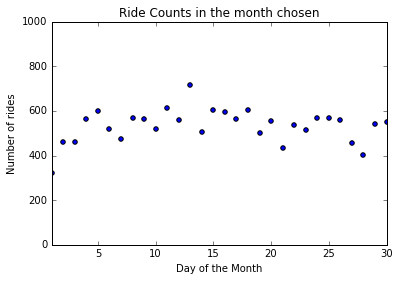

In [14]:
interactive_plot_month_rides()

<function __main__.plot_weekday_rides>

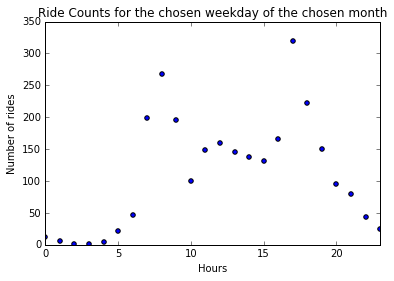

In [8]:
interactive_plot_weekday_rides()

<hr>
Our second aim was to find out who uses Pronto more - men or women. Going through all those columns of the dataframe trips will be difficult, so let's isolate gender-ride info and create a plot of how each gender used Pronto bikes in the two years 2014 and 2015.

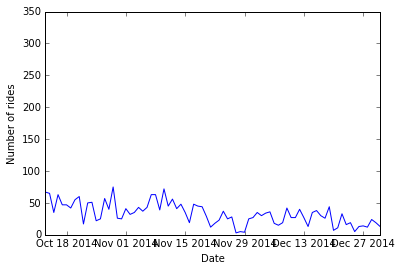

In [9]:
def plot_gender_by_counts_in_year(Gender, Year):
    
    '''Function plots the ride counts of a selected gender for a certain year'''
    
    trips_gender = trips.pivot_table('trip_id', aggfunc = 'count', index = trips.index, columns = 'gender')
    trips_gender_times = pd.DatetimeIndex(trips_gender.index)
    trips_gender = trips_gender.groupby(trips_gender_times.date).sum()
    trips_gender.index.name = 'Date'
    trips_gender = trips_gender[Gender]
    times = pd.DatetimeIndex(trips_gender.index)
    trips_gender_year = trips_gender[times.year == int(Year)]
    
    plt.plot(trips_gender_year)
    plt.ylim(0, 350)
    plt.xlabel('Date')
    plt.ylabel('Number of rides')

interact(plot_gender_by_counts_in_year, Gender = ipywidgets.RadioButtons(description = 'Gender', options = ['Female', 'Male', 'Other']), Year = ['2014','2015']);

<hr>
Our third aim was to find out who makes more rides and rides longer, annual or daily pass members.

<function __main__.plot_members_by_count_and_duration>

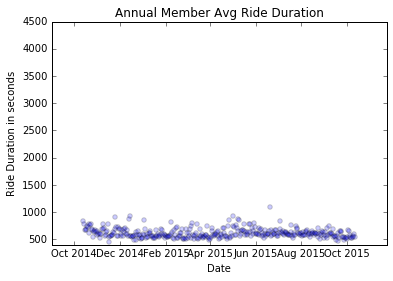

In [10]:
def plot_members_by_count_and_duration(Member, Plotting): 
    
    '''Function plots the ride counts or ride duration of a selected usertype as a function of time'''
    
    trips_count = trips.pivot_table('trip_id', aggfunc = 'count', index = trips.index, columns = 'usertype')
    trips_count_times = pd.DatetimeIndex(trips_count.index)
    trips_count = trips_count.groupby(trips_count_times.date).sum()
    trips_count.index.name = 'Date'
    trips_count.rename(columns = {'Annual Member':"Annual Member Ride Count", 'Short-Term Pass Holder':"Short-Term Pass Holder Ride Count"}, inplace = True)
    # trips_count is a Dataframe of the ride counts of each type of member over time
    
    trips_duration = trips.groupby([trips.index.date,"usertype"])["tripduration"].mean()
    trips_duration = trips_duration.unstack()
    trips_duration.index.name = 'Date'
    trips_duration.rename(columns = {'Annual Member':"Annual Member Avg Ride Duration in seconds", 'Short-Term Pass Holder': "Short-Term Pass Holder Avg Ride Duration in seconds"}, inplace = True)
    # trips_duration is a Dataframe of the ride duration of each type of member over time, in seconds
    
    t = trips_count.join(trips_duration)
    # Joining the two Dataframes
    
    # Applying conditions for plotting, 
    if Plotting == 'Avg Ride Duration' and Member == 'Annual Member ':
        plt.scatter(t.index, t['Annual Member Avg Ride Duration in seconds'], alpha = 0.2)
        plt.ylabel('Ride Duration in seconds')
        plt.ylim(400, 4500)
    elif Plotting == 'Avg Ride Duration' and Member == 'Short-Term Pass Holder ':
        plt.scatter(t.index, t['Short-Term Pass Holder Avg Ride Duration in seconds'], alpha = 0.2)
        plt.ylabel('Ride Duration in seconds')
        plt.ylim(400, 4500)
    elif Plotting == 'Ride Count' and Member == 'Annual Member ':
        plt.scatter(t.index, t['Annual Member Ride Count'], alpha = 0.2)
        plt.ylabel('Ride Count')
        plt.ylim(0, 700)
    else:
        plt.scatter(t.index, t['Short-Term Pass Holder Ride Count'], alpha = 0.2)
        plt.ylabel('Ride Count')
        plt.ylim(0, 700)
    
    plt.xlabel('Date')
    plt.title( Member+ Plotting)
    
interact(plot_members_by_count_and_duration, Member = ['Annual Member ', 'Short-Term Pass Holder '], Plotting = ['Avg Ride Duration', 'Ride Count'])

<hr>In this analysis, we find the solution to our questions<br/>
<pre><b>When are the best times of the day and the best days of the month to be using Pronto, considering the bike traffic?</b><pre>
The summer months show maximum traffic, while the winter months show the least.<br> The peak hours of the day are 7-10am and 4-6pm. There is no useful trend in ride counts over a certain month.
</pre><b>Who uses Pronto more, men or women? </b><pre>
Men use Pronto about 5 times as much as women.
</pre><b>Who makes more rides through the year, annual or daily pass members?</b><pre>
Annual members make more ride counts than daily pass members but ride about 1/4th the duration<br>as compared to daily pass members.

Let's use Pronto!

<hr>
In my analysis, I used the magic command %matplotlib inline to print my plots in the same window as my scripts.<br>
I used the shell commands pwd , ls , cd and ipython notebook to change directories and start this Jupyter Notebook. <br>
I used the shortcuts Shift+Enter to execute commands, and Tab completion to work faster. <br>
Making use of Markdown cell types, I was able to write Emily's story. <br>
<hr>